# Process the data

## 1.white box attack

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision

FGSM_decrease_rate_v2_0 = []
FGSM_decrease_rate_v2_1 = []
PGD_decrease_rate_v2_0 = []
PGD_decrease_rate_v2_1 = []
score2_0_original = []
score2_1_original = []
score2_0_attacked_FGSM = []
score2_1_attacked_FGSM = []
score2_0_attacked_PGD = []
score2_1_attacked_PGD = []



for i in range(100):
    df = pd.read_csv(f"outputs/white_box_attack/scores/results_{i}.csv")
    for index, row in df.iterrows():
        FGSM_decrease_rate_v2_0.append((row["score2_0_original"] - row["score2_0_attacked_FGSM"])/row["score2_0_original"])
        FGSM_decrease_rate_v2_1.append((row["score2_1_original"] - row["score2_1_attacked_FGSM"])/row["score2_1_original"])
        PGD_decrease_rate_v2_0.append((row["score2_0_original"] - row["score2_0_attacked_PGD"])/row["score2_0_original"])
        PGD_decrease_rate_v2_1.append((row["score2_1_original"] - row["score2_1_attacked_PGD"])/row["score2_1_original"])
        score2_0_original.append(row["score2_0_original"])
        score2_1_original.append(row["score2_1_original"])
        score2_0_attacked_FGSM.append(row["score2_0_attacked_FGSM"])
        score2_1_attacked_FGSM.append(row["score2_1_attacked_FGSM"])
        score2_0_attacked_PGD.append(row["score2_0_attacked_PGD"])
        score2_1_attacked_PGD.append(row["score2_1_attacked_PGD"])
results_df = pd.DataFrame({
    "FGSM_decrease_rate_v2_0": FGSM_decrease_rate_v2_0,
    "FGSM_decrease_rate_v2_1": FGSM_decrease_rate_v2_1,
    "PGD_decrease_rate_v2_0": PGD_decrease_rate_v2_0,
    "PGD_decrease_rate_v2_1": PGD_decrease_rate_v2_1,
    "score2_0_original": score2_0_original,
    "score2_1_original": score2_1_original,
    "score2_0_attacked_FGSM": score2_0_attacked_FGSM,
    "score2_1_attacked_FGSM": score2_1_attacked_FGSM,
    "score2_0_attacked_PGD": score2_0_attacked_PGD,
    "score2_1_attacked_PGD": score2_1_attacked_PGD
})

results_df.to_csv("outputs/white_box_attack/scores/decrease_rate_and_score.csv", index=False)


Mean decrease rates:
FGSM v2.0: 0.0495 ± 0.0250
FGSM v2.1: 0.1140 ± 0.0808
PGD v2.0: 0.1218 ± 0.0514
PGD v2.1: 0.2541 ± 0.1170



C:\Users\76381\AppData\Local\Temp\ipykernel_44876\2391378734.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["FGSM v2.0", "FGSM v2.1", "PGD v2.0", "PGD v2.1"], patch_artist=True)


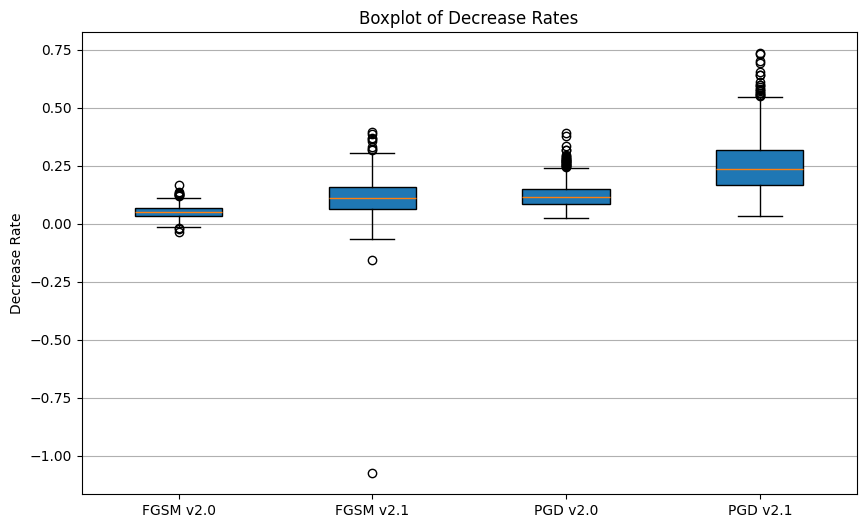

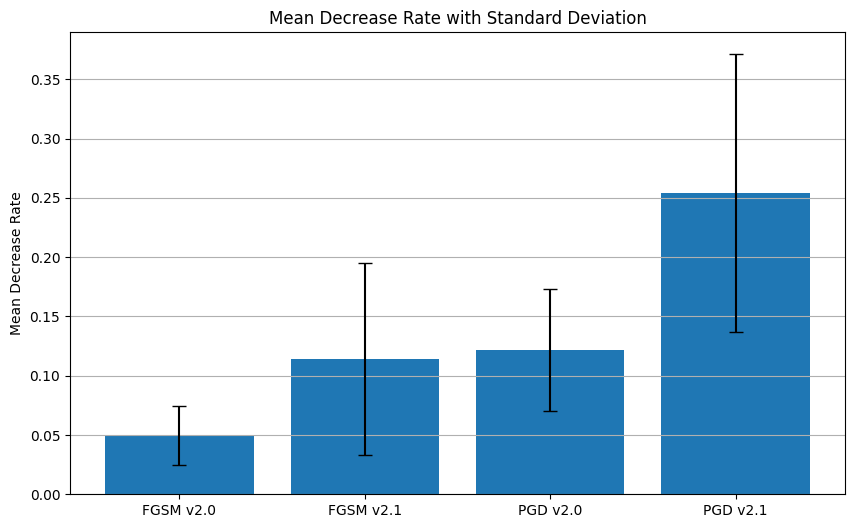

Average scores:
Original v2.0: 0.2576 ± 0.0195
Original v2.1: 0.2095 ± 0.0504
FGSM v2.0: 0.2450 ± 0.0214
FGSM v2.1: 0.1864 ± 0.0511
PGD v2.0: 0.2266 ± 0.0254
PGD v2.1: 0.1592 ± 0.0525



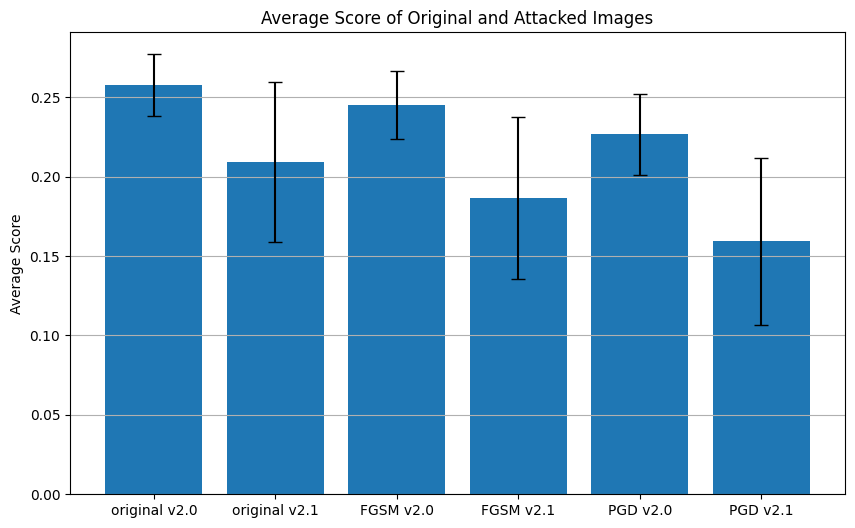

Score statistics:
original v2.0: min=0.1740, max=0.3020, median=0.2588
original v2.1: min=0.0288, max=0.3370, median=0.2085
FGSM v2.0: min=0.1649, max=0.2960, median=0.2455
FGSM v2.1: min=0.0305, max=0.3090, median=0.1847
PGD v2.0: min=0.1057, max=0.2866, median=0.2279
PGD v2.1: min=0.0135, max=0.2900, median=0.1570



C:\Users\76381\AppData\Local\Temp\ipykernel_44876\2391378734.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(score_data, labels=labels, patch_artist=True)


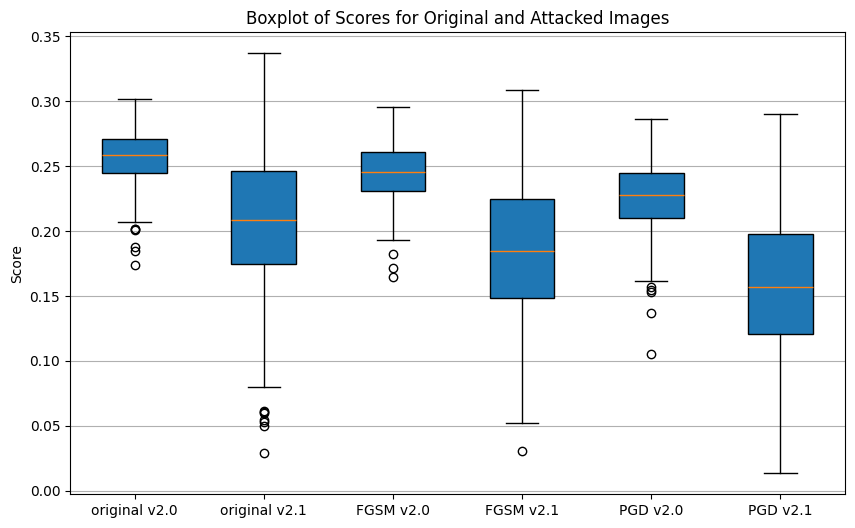

In [32]:


df = pd.read_csv("outputs/white_box_attack/scores/decrease_rate_and_score.csv")
import pandas as pd
import matplotlib.pyplot as plt


methods = ["FGSM_decrease_rate_v2_0", "FGSM_decrease_rate_v2_1", 
        "PGD_decrease_rate_v2_0", "PGD_decrease_rate_v2_1"]

data = [df[col] for col in methods]

# Calculate and print mean decrease rates
means = [d.mean() for d in data]
stds = [d.std() for d in data]
print("Mean decrease rates:")
print(f"FGSM v2.0: {means[0]:.4f} ± {stds[0]:.4f}")
print(f"FGSM v2.1: {means[1]:.4f} ± {stds[1]:.4f}")
print(f"PGD v2.0: {means[2]:.4f} ± {stds[2]:.4f}")
print(f"PGD v2.1: {means[3]:.4f} ± {stds[3]:.4f}")
print()

# ========== 1. draw the boxplot ==========
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=["FGSM v2.0", "FGSM v2.1", "PGD v2.0", "PGD v2.1"], patch_artist=True)
plt.title("Boxplot of Decrease Rates")
plt.ylabel("Decrease Rate")
plt.grid(axis='y')
plt.show()

# ========== 2. draw the bar chart of the mean decrease rate ==========
plt.figure(figsize=(10, 6))
plt.bar(["FGSM v2.0", "FGSM v2.1", "PGD v2.0", "PGD v2.1"], means, yerr=stds, capsize=5)
plt.title("Mean Decrease Rate with Standard Deviation")
plt.ylabel("Mean Decrease Rate")
plt.grid(axis='y')
plt.show()
#========== 3. draw the bar chart of the average score of the original and attacked images ==========

score2_0_original = df["score2_0_original"]
score2_1_original = df["score2_1_original"]
score2_0_attacked_FGSM = df["score2_0_attacked_FGSM"]
score2_1_attacked_FGSM = df["score2_1_attacked_FGSM"]
score2_0_attacked_PGD = df["score2_0_attacked_PGD"]
score2_1_attacked_PGD = df["score2_1_attacked_PGD"]

#calculate the average score of the original and attacked images
score2_0_original_mean = score2_0_original.mean()
score2_1_original_mean = score2_1_original.mean()
score2_0_attacked_FGSM_mean = score2_0_attacked_FGSM.mean()
score2_1_attacked_FGSM_mean = score2_1_attacked_FGSM.mean()
score2_0_attacked_PGD_mean = score2_0_attacked_PGD.mean()
score2_1_attacked_PGD_mean = score2_1_attacked_PGD.mean()

#calculate the standard deviation of the original and attacked images
score2_0_original_std = score2_0_original.std()
score2_1_original_std = score2_1_original.std()
score2_0_attacked_FGSM_std = score2_0_attacked_FGSM.std()
score2_1_attacked_FGSM_std = score2_1_attacked_FGSM.std()
score2_0_attacked_PGD_std = score2_0_attacked_PGD.std()
score2_1_attacked_PGD_std = score2_1_attacked_PGD.std()

# Print average scores
print("Average scores:")
print(f"Original v2.0: {score2_0_original_mean:.4f} ± {score2_0_original_std:.4f}")
print(f"Original v2.1: {score2_1_original_mean:.4f} ± {score2_1_original_std:.4f}")
print(f"FGSM v2.0: {score2_0_attacked_FGSM_mean:.4f} ± {score2_0_attacked_FGSM_std:.4f}")
print(f"FGSM v2.1: {score2_1_attacked_FGSM_mean:.4f} ± {score2_1_attacked_FGSM_std:.4f}")
print(f"PGD v2.0: {score2_0_attacked_PGD_mean:.4f} ± {score2_0_attacked_PGD_std:.4f}")
print(f"PGD v2.1: {score2_1_attacked_PGD_mean:.4f} ± {score2_1_attacked_PGD_std:.4f}")
print()

#draw the bar chart of the average score of the original and attacked images
plt.figure(figsize=(10, 6))
plt.bar(["original v2.0", "original v2.1", "FGSM v2.0", "FGSM v2.1", "PGD v2.0", "PGD v2.1"], [score2_0_original_mean, score2_1_original_mean, score2_0_attacked_FGSM_mean, score2_1_attacked_FGSM_mean, score2_0_attacked_PGD_mean, score2_1_attacked_PGD_mean], yerr=[score2_0_original_std, score2_1_original_std, score2_0_attacked_FGSM_std, score2_1_attacked_FGSM_std, score2_0_attacked_PGD_std, score2_1_attacked_PGD_std], capsize=5)
plt.title("Average Score of Original and Attacked Images")
plt.ylabel("Average Score")
plt.grid(axis='y')
plt.show()

#========== 4. draw the boxplot of the scores of the original and attacked images ==========
score_data = [
    score2_0_original, 
    score2_1_original, 
    score2_0_attacked_FGSM, 
    score2_1_attacked_FGSM, 
    score2_0_attacked_PGD, 
    score2_1_attacked_PGD
]

# Print min, max, median values
print("Score statistics:")
labels = ["original v2.0", "original v2.1", "FGSM v2.0", "FGSM v2.1", "PGD v2.0", "PGD v2.1"]
for i, data_series in enumerate(score_data):
    print(f"{labels[i]}: min={data_series.min():.4f}, max={data_series.max():.4f}, median={data_series.median():.4f}")
print()

plt.figure(figsize=(10, 6))
plt.boxplot(score_data, labels=labels, patch_artist=True)
plt.title("Boxplot of Scores for Original and Attacked Images")
plt.ylabel("Score")
plt.grid(axis='y')
plt.show()



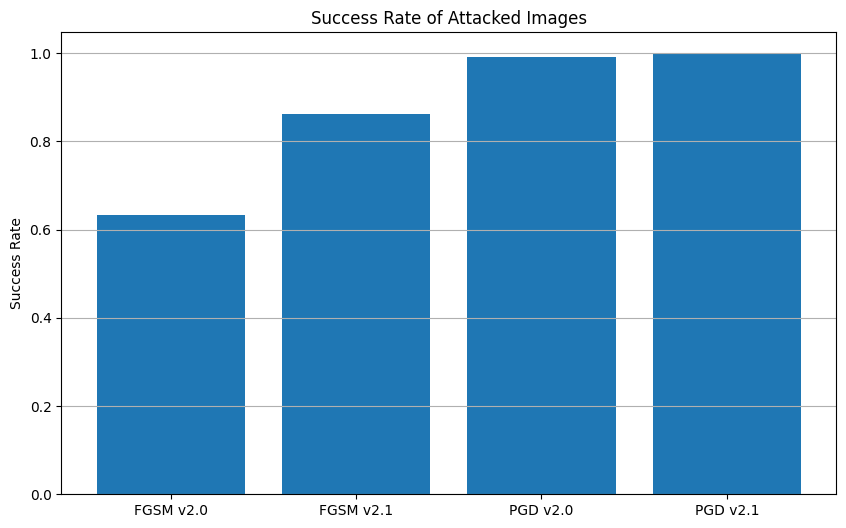

success rate of FGSM v2.0 when n=0.95:  0.47555555555555556
success rate of FGSM v2.1 when n=0.95:  0.8222222222222222
success rate of PGD v2.0 when n=0.95:  0.9711111111111111
success rate of PGD v2.1 when n=0.95:  0.9944444444444445
success rate of FGSM v2.0 when n=0.96:  0.6344444444444445
success rate of FGSM v2.1 when n=0.96:  0.8633333333333333
success rate of PGD v2.0 when n=0.96:  0.9911111111111112
success rate of PGD v2.1 when n=0.96:  0.9977777777777778
success rate of FGSM v2.0 when n=0.97:  0.7833333333333333
success rate of FGSM v2.1 when n=0.97:  0.9033333333333333
success rate of PGD v2.0 when n=0.97:  0.9966666666666667
success rate of PGD v2.1 when n=0.97:  1.0


In [22]:
# calculate the success rate of the attacked images
success_rate_FGSM_v2_0 = (df["score2_0_attacked_FGSM"] < 0.96*df["score2_0_original"]).mean()
success_rate_FGSM_v2_1 = (df["score2_1_attacked_FGSM"] < 0.96*df["score2_1_original"]).mean()
success_rate_PGD_v2_0 = (df["score2_0_attacked_PGD"] < 0.96*df["score2_0_original"]).mean()
success_rate_PGD_v2_1 = (df["score2_1_attacked_PGD"] < 0.96*df["score2_1_original"]).mean()

#draw the bar chart of the success rate of the attacked images
plt.figure(figsize=(10, 6))
plt.bar(["FGSM v2.0", "FGSM v2.1", "PGD v2.0", "PGD v2.1"], [success_rate_FGSM_v2_0, success_rate_FGSM_v2_1, success_rate_PGD_v2_0, success_rate_PGD_v2_1], capsize=5)
plt.title("Success Rate of Attacked Images")
plt.ylabel("Success Rate")
plt.grid(axis='y')
plt.show()
#Success rate for different standards
n=0.95
# calculate the success rate of the attacked images
success_rate_FGSM_v2_0 = (df["score2_0_attacked_FGSM"] < n*df["score2_0_original"]).mean()
success_rate_FGSM_v2_1 = (df["score2_1_attacked_FGSM"] < n*df["score2_1_original"]).mean()
success_rate_PGD_v2_0 = (df["score2_0_attacked_PGD"] < n*df["score2_0_original"]).mean()
success_rate_PGD_v2_1 = (df["score2_1_attacked_PGD"] < n*df["score2_1_original"]).mean()

print("success rate of FGSM v2.0 when n=0.95: ", success_rate_FGSM_v2_0)
print("success rate of FGSM v2.1 when n=0.95: ", success_rate_FGSM_v2_1)
print("success rate of PGD v2.0 when n=0.95: ", success_rate_PGD_v2_0)
print("success rate of PGD v2.1 when n=0.95: ", success_rate_PGD_v2_1)

n=0.96
# calculate the success rate of the attacked images
success_rate_FGSM_v2_0 = (df["score2_0_attacked_FGSM"] < n*df["score2_0_original"]).mean()
success_rate_FGSM_v2_1 = (df["score2_1_attacked_FGSM"] < n*df["score2_1_original"]).mean()
success_rate_PGD_v2_0 = (df["score2_0_attacked_PGD"] < n*df["score2_0_original"]).mean()
success_rate_PGD_v2_1 = (df["score2_1_attacked_PGD"] < n*df["score2_1_original"]).mean()

print("success rate of FGSM v2.0 when n=0.96: ", success_rate_FGSM_v2_0)
print("success rate of FGSM v2.1 when n=0.96: ", success_rate_FGSM_v2_1)
print("success rate of PGD v2.0 when n=0.96: ", success_rate_PGD_v2_0)
print("success rate of PGD v2.1 when n=0.96: ", success_rate_PGD_v2_1)

n=0.97
# calculate the success rate of the attacked images
success_rate_FGSM_v2_0 = (df["score2_0_attacked_FGSM"] < n*df["score2_0_original"]).mean()
success_rate_FGSM_v2_1 = (df["score2_1_attacked_FGSM"] < n*df["score2_1_original"]).mean()
success_rate_PGD_v2_0 = (df["score2_0_attacked_PGD"] < n*df["score2_0_original"]).mean()
success_rate_PGD_v2_1 = (df["score2_1_attacked_PGD"] < n*df["score2_1_original"]).mean()

print("success rate of FGSM v2.0 when n=0.97: ", success_rate_FGSM_v2_0)
print("success rate of FGSM v2.1 when n=0.97: ", success_rate_FGSM_v2_1)
print("success rate of PGD v2.0 when n=0.97: ", success_rate_PGD_v2_0)
print("success rate of PGD v2.1 when n=0.97: ", success_rate_PGD_v2_1)




## 2.relative susceptibility of different text-to-image diffusion models







In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# mean score of different models before and after attack
score_path = "outputs/attack_images_generated_by_different_models/scores"
MODEL_LIST = ["dreamshaper", "dreamlike_photoreal", "realistic_vision", "openjourney", "sd_v1_5", "sd_v2_1"]
score_path_list = [os.path.join(score_path, model) for model in MODEL_LIST]


for path in score_path_list:
    sum_original_score_v2_0 = 0
    sum_original_score_v2_1 = 0
    sum_attacked_score_v2_0_PGD = 0
    sum_attacked_score_v2_1_PGD = 0
    sum_attacked_score_v2_0_FGSM = 0
    sum_attacked_score_v2_1_FGSM = 0
    sum_decrease_rate_v2_0_PGD = 0
    sum_decrease_rate_v2_1_PGD = 0
    sum_decrease_rate_v2_0_FGSM = 0
    sum_decrease_rate_v2_1_FGSM = 0
    count = 0
    for file in os.listdir(path):
        if file.endswith("all_results.csv"):
            continue
        df = pd.read_csv(os.path.join(path, file))
        model_name = path.split("/")[-1]
        for index, row in df.iterrows():
            sum_original_score_v2_0 += row["score2_0_original"]
            sum_original_score_v2_1 += row["score2_1_original"]
            sum_attacked_score_v2_0_PGD += row["score2_0_attacked_PGD"]
            sum_attacked_score_v2_1_PGD += row["score2_1_attacked_PGD"]
            sum_attacked_score_v2_0_FGSM += row["score2_0_attacked_FGSM"]
            sum_attacked_score_v2_1_FGSM += row["score2_1_attacked_FGSM"]
            sum_decrease_rate_v2_0_PGD += (row["score2_0_original"] - row["score2_0_attacked_PGD"]) / row["score2_0_original"]
            sum_decrease_rate_v2_1_PGD += (row["score2_1_original"] - row["score2_1_attacked_PGD"]) / row["score2_1_original"]
            sum_decrease_rate_v2_0_FGSM += (row["score2_0_original"] - row["score2_0_attacked_FGSM"]) / row["score2_0_original"]
            sum_decrease_rate_v2_1_FGSM += (row["score2_1_original"] - row["score2_1_attacked_FGSM"]) / row["score2_1_original"]
            count += 1
    
    # 创建带有索引的DataFrame
    results_df = pd.DataFrame({
        "model": [model_name],
        "mean_original_score_v2_0": [sum_original_score_v2_0 / count],
        "mean_original_score_v2_1": [sum_original_score_v2_1 / count],
        "mean_attacked_score_v2_0_PGD": [sum_attacked_score_v2_0_PGD / count],
        "mean_attacked_score_v2_1_PGD": [sum_attacked_score_v2_1_PGD / count],
        "mean_attacked_score_v2_0_FGSM": [sum_attacked_score_v2_0_FGSM / count],
        "mean_attacked_score_v2_1_FGSM": [sum_attacked_score_v2_1_FGSM / count],
        "mean_decrease_rate_v2_0_PGD": [sum_decrease_rate_v2_0_PGD / count],
        "mean_decrease_rate_v2_1_PGD": [sum_decrease_rate_v2_1_PGD / count],
        "mean_decrease_rate_v2_0_FGSM": [sum_decrease_rate_v2_0_FGSM / count],
        "mean_decrease_rate_v2_1_FGSM": [sum_decrease_rate_v2_1_FGSM / count]
    })
    
    results_df.to_csv(os.path.join(path, "all_results.csv"))


Model Names: ['dreamshaper', 'dreamlike_photoreal', 'realistic_vision', 'openjourney', 'sd_v1_5', 'sd_v2_1']

Original Scores v2.0: [np.float64(0.3006087500000001), np.float64(0.29414625), np.float64(0.2937575), np.float64(0.28530125), np.float64(0.2776187499999999), np.float64(0.2827912499999999)]
Original Scores v2.1: [np.float64(0.3313024999999999), np.float64(0.30533375), np.float64(0.31314375), np.float64(0.2846949999999999), np.float64(0.2588524999999999), np.float64(0.2719224999999999)]

Attacked Scores v2.0 PGD: [np.float64(0.2626237499999999), np.float64(0.2603037499999999), np.float64(0.2604162499999999), np.float64(0.2550325), np.float64(0.2474412499999998), np.float64(0.24905375)]
Attacked Scores v2.1 PGD: [np.float64(0.2730599999999999), np.float64(0.2571475), np.float64(0.26337875), np.float64(0.23511375), np.float64(0.2104849999999999), np.float64(0.2145212499999999)]
Attacked Scores v2.0 FGSM: [np.float64(0.2816237500000002), np.float64(0.2771175), np.float64(0.27933375

<Figure size 1500x1000 with 0 Axes>

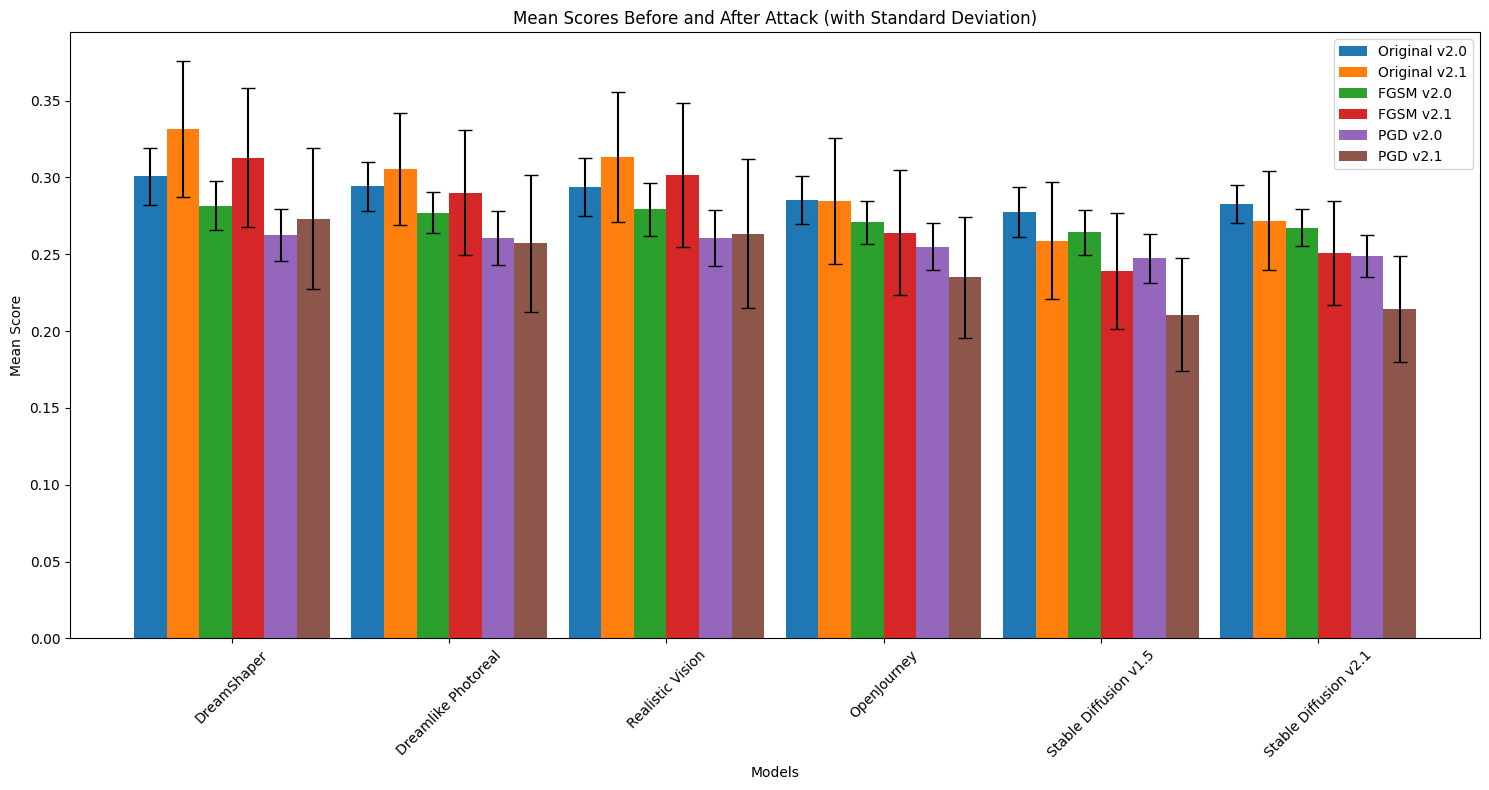

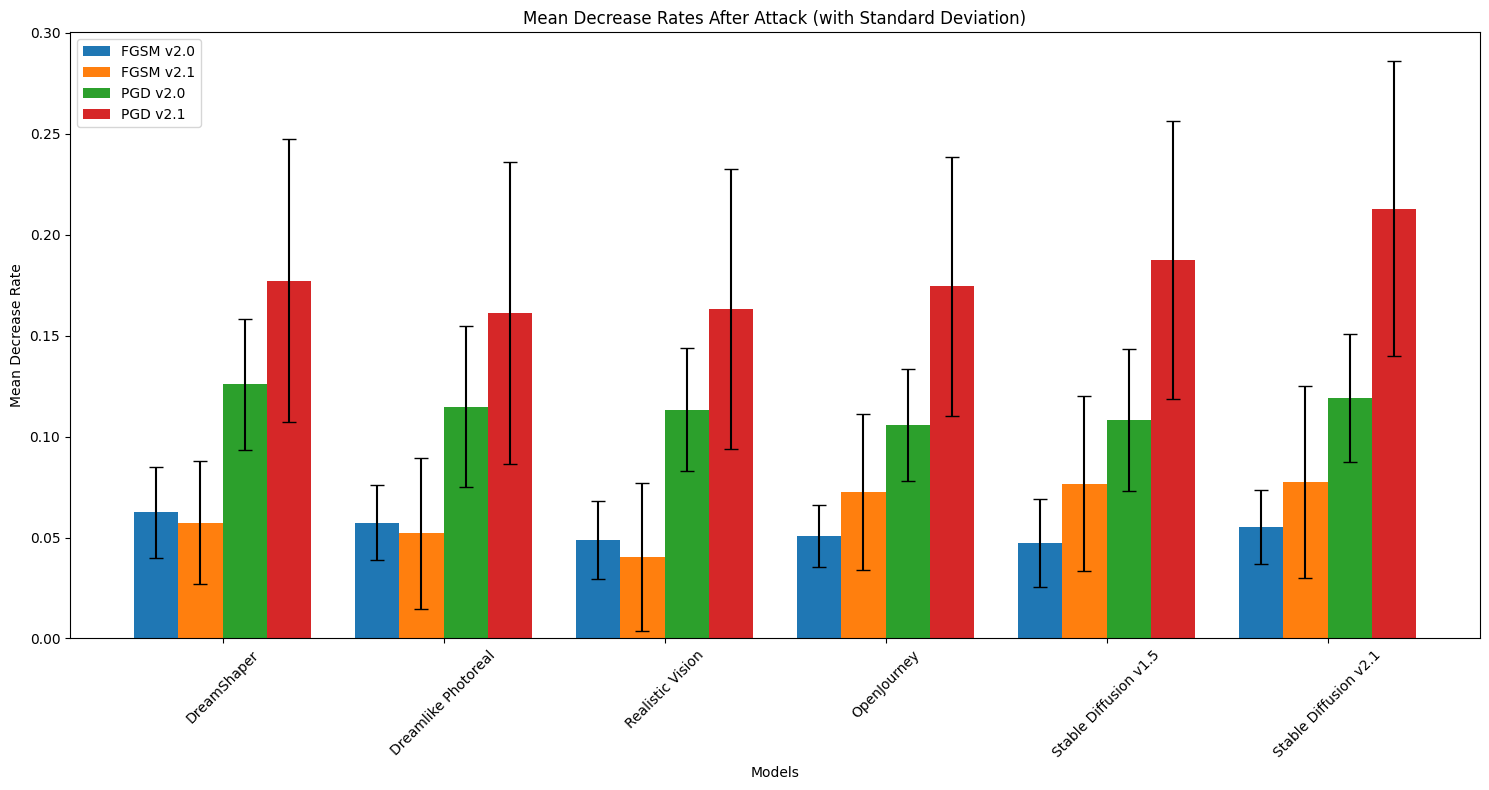


Model: dreamshaper, Total Images: 80
Success Counts: {'FGSM_v2_0': 55, 'FGSM_v2_1': 45, 'PGD_v2_0': 79, 'PGD_v2_1': 79}

Model: dreamlike_photoreal, Total Images: 80
Success Counts: {'FGSM_v2_0': 47, 'FGSM_v2_1': 38, 'PGD_v2_0': 80, 'PGD_v2_1': 79}

Model: realistic_vision, Total Images: 80
Success Counts: {'FGSM_v2_0': 37, 'FGSM_v2_1': 31, 'PGD_v2_0': 78, 'PGD_v2_1': 76}

Model: openjourney, Total Images: 80
Success Counts: {'FGSM_v2_0': 43, 'FGSM_v2_1': 60, 'PGD_v2_0': 78, 'PGD_v2_1': 77}

Model: sd_v1_5, Total Images: 80
Success Counts: {'FGSM_v2_0': 35, 'FGSM_v2_1': 61, 'PGD_v2_0': 78, 'PGD_v2_1': 80}

Model: sd_v2_1, Total Images: 80
Success Counts: {'FGSM_v2_0': 51, 'FGSM_v2_1': 57, 'PGD_v2_0': 80, 'PGD_v2_1': 80}

Attack Success Rates (threshold = 0.05):
--------------------------------------------------------------------------------
Model                FGSM v2.0    FGSM v2.1    PGD v2.0     PGD v2.1    
-------------------------------------------------------------------------

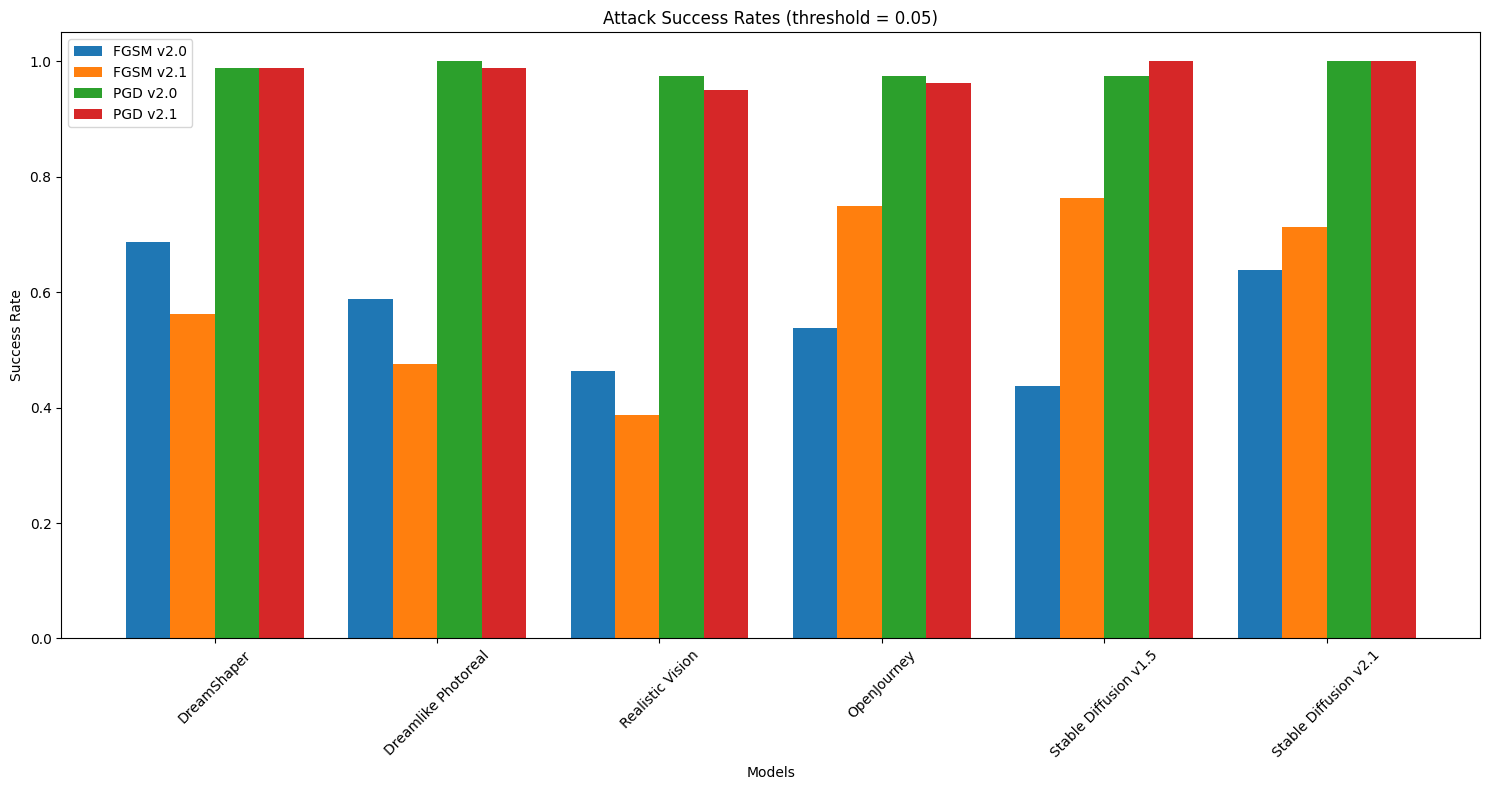

In [36]:
import matplotlib.pyplot as plt
import numpy as np



# mean score of different models before and after attack
score_path = "outputs/attack_images_generated_by_different_models/scores"
MODEL_LIST = ["dreamshaper", "dreamlike_photoreal", "realistic_vision", "openjourney", "sd_v1_5", "sd_v2_1"]

score_path_list = [os.path.join(score_path, model) for model in MODEL_LIST]
# Define a dictionary to map model shortnames to full names
MODEL_FULL_NAMES = {
    "dreamshaper": "DreamShaper",
    "dreamlike_photoreal": "Dreamlike Photoreal",
    "realistic_vision": "Realistic Vision",
    "openjourney": "OpenJourney",
    "sd_v1_5": "Stable Diffusion v1.5",
    "sd_v2_1": "Stable Diffusion v2.1"
}

# Create a list of full model names for plotting
full_model_names = [MODEL_FULL_NAMES[model] for model in MODEL_LIST]



# Task 1 & 2: Create bar charts for scores and decrease rates
plt.figure(figsize=(15, 10))

# Initialize lists to store data for each model
original_scores_v2_0 = []
original_scores_v2_1 = []
attacked_scores_v2_0_PGD = []
attacked_scores_v2_1_PGD = []
attacked_scores_v2_0_FGSM = []
attacked_scores_v2_1_FGSM = []
decrease_rates_v2_0_PGD = []
decrease_rates_v2_1_PGD = []
decrease_rates_v2_0_FGSM = []
decrease_rates_v2_1_FGSM = []
model_names = []

# Initialize lists to store standard deviations for error bars
std_original_v2_0 = []
std_original_v2_1 = []
std_attacked_v2_0_PGD = []
std_attacked_v2_1_PGD = []
std_attacked_v2_0_FGSM = []
std_attacked_v2_1_FGSM = []
std_decrease_v2_0_PGD = []
std_decrease_v2_1_PGD = []
std_decrease_v2_0_FGSM = []
std_decrease_v2_1_FGSM = []

# Collect data from all models using the pre-calculated results
for model_name in MODEL_LIST:
    model_path = os.path.join(score_path, model_name)
    all_results_path = os.path.join(model_path, "all_results.csv")
    
    if os.path.exists(all_results_path):
        df = pd.read_csv(all_results_path)
        model_names.append(model_name)
        original_scores_v2_0.append(df["mean_original_score_v2_0"].values[0])
        original_scores_v2_1.append(df["mean_original_score_v2_1"].values[0])
        attacked_scores_v2_0_PGD.append(df["mean_attacked_score_v2_0_PGD"].values[0])
        attacked_scores_v2_1_PGD.append(df["mean_attacked_score_v2_1_PGD"].values[0])
        attacked_scores_v2_0_FGSM.append(df["mean_attacked_score_v2_0_FGSM"].values[0])
        attacked_scores_v2_1_FGSM.append(df["mean_attacked_score_v2_1_FGSM"].values[0])
        decrease_rates_v2_0_PGD.append(df["mean_decrease_rate_v2_0_PGD"].values[0])
        decrease_rates_v2_1_PGD.append(df["mean_decrease_rate_v2_1_PGD"].values[0])
        decrease_rates_v2_0_FGSM.append(df["mean_decrease_rate_v2_0_FGSM"].values[0])
        decrease_rates_v2_1_FGSM.append(df["mean_decrease_rate_v2_1_FGSM"].values[0])
        
        # Calculate standard deviations for each model by processing individual files
        all_scores_v2_0 = []
        all_scores_v2_1 = []
        all_attacked_v2_0_PGD = []
        all_attacked_v2_1_PGD = []
        all_attacked_v2_0_FGSM = []
        all_attacked_v2_1_FGSM = []
        all_decrease_v2_0_PGD = []
        all_decrease_v2_1_PGD = []
        all_decrease_v2_0_FGSM = []
        all_decrease_v2_1_FGSM = []
        
        for file in os.listdir(model_path):
            if file.endswith("all_results.csv") or not file.endswith(".csv"):
                continue
                
            file_df = pd.read_csv(os.path.join(model_path, file))
            all_scores_v2_0.extend(file_df["score2_0_original"].values)
            all_scores_v2_1.extend(file_df["score2_1_original"].values)
            all_attacked_v2_0_PGD.extend(file_df["score2_0_attacked_PGD"].values)
            all_attacked_v2_1_PGD.extend(file_df["score2_1_attacked_PGD"].values)
            all_attacked_v2_0_FGSM.extend(file_df["score2_0_attacked_FGSM"].values)
            all_attacked_v2_1_FGSM.extend(file_df["score2_1_attacked_FGSM"].values)
            
            # Calculate decrease rates for each row
            for _, row in file_df.iterrows():
                decrease_v2_0_PGD = (row["score2_0_original"] - row["score2_0_attacked_PGD"]) / row["score2_0_original"]
                decrease_v2_1_PGD = (row["score2_1_original"] - row["score2_1_attacked_PGD"]) / row["score2_1_original"]
                decrease_v2_0_FGSM = (row["score2_0_original"] - row["score2_0_attacked_FGSM"]) / row["score2_0_original"]
                decrease_v2_1_FGSM = (row["score2_1_original"] - row["score2_1_attacked_FGSM"]) / row["score2_1_original"]
                
                all_decrease_v2_0_PGD.append(decrease_v2_0_PGD)
                all_decrease_v2_1_PGD.append(decrease_v2_1_PGD)
                all_decrease_v2_0_FGSM.append(decrease_v2_0_FGSM)
                all_decrease_v2_1_FGSM.append(decrease_v2_1_FGSM)
        
        # Calculate standard deviations
        std_original_v2_0.append(np.std(all_scores_v2_0) if all_scores_v2_0 else 0)
        std_original_v2_1.append(np.std(all_scores_v2_1) if all_scores_v2_1 else 0)
        std_attacked_v2_0_PGD.append(np.std(all_attacked_v2_0_PGD) if all_attacked_v2_0_PGD else 0)
        std_attacked_v2_1_PGD.append(np.std(all_attacked_v2_1_PGD) if all_attacked_v2_1_PGD else 0)
        std_attacked_v2_0_FGSM.append(np.std(all_attacked_v2_0_FGSM) if all_attacked_v2_0_FGSM else 0)
        std_attacked_v2_1_FGSM.append(np.std(all_attacked_v2_1_FGSM) if all_attacked_v2_1_FGSM else 0)
        std_decrease_v2_0_PGD.append(np.std(all_decrease_v2_0_PGD) if all_decrease_v2_0_PGD else 0)
        std_decrease_v2_1_PGD.append(np.std(all_decrease_v2_1_PGD) if all_decrease_v2_1_PGD else 0)
        std_decrease_v2_0_FGSM.append(np.std(all_decrease_v2_0_FGSM) if all_decrease_v2_0_FGSM else 0)
        std_decrease_v2_1_FGSM.append(np.std(all_decrease_v2_1_FGSM) if all_decrease_v2_1_FGSM else 0)

# Print collected data
print("Model Names:", model_names)
print("\nOriginal Scores v2.0:", original_scores_v2_0)
print("Original Scores v2.1:", original_scores_v2_1)
print("\nAttacked Scores v2.0 PGD:", attacked_scores_v2_0_PGD)
print("Attacked Scores v2.1 PGD:", attacked_scores_v2_1_PGD)
print("Attacked Scores v2.0 FGSM:", attacked_scores_v2_0_FGSM)
print("Attacked Scores v2.1 FGSM:", attacked_scores_v2_1_FGSM)
print("\nDecrease Rates v2.0 PGD:", decrease_rates_v2_0_PGD)
print("Decrease Rates v2.1 PGD:", decrease_rates_v2_1_PGD)
print("Decrease Rates v2.0 FGSM:", decrease_rates_v2_0_FGSM)
print("Decrease Rates v2.1 FGSM:", decrease_rates_v2_1_FGSM)

# Print standard deviations
print("\nStandard Deviations:")
print("Original Scores v2.0:", std_original_v2_0)
print("Original Scores v2.1:", std_original_v2_1)
print("Attacked Scores v2.0 PGD:", std_attacked_v2_0_PGD)
print("Attacked Scores v2.1 PGD:", std_attacked_v2_1_PGD)
print("Attacked Scores v2.0 FGSM:", std_attacked_v2_0_FGSM)
print("Attacked Scores v2.1 FGSM:", std_attacked_v2_1_FGSM)

# Task 1: Bar chart for scores before and after attack
plt.figure(figsize=(15, 8))
x = np.arange(len(model_names))
width = 0.15

# Create bars with error bars
plt.bar(x - 2.5*width, original_scores_v2_0, width, yerr=std_original_v2_0, label='Original v2.0', capsize=5)
plt.bar(x - 1.5*width, original_scores_v2_1, width, yerr=std_original_v2_1, label='Original v2.1', capsize=5)
plt.bar(x - 0.5*width, attacked_scores_v2_0_FGSM, width, yerr=std_attacked_v2_0_FGSM, label='FGSM v2.0', capsize=5)
plt.bar(x + 0.5*width, attacked_scores_v2_1_FGSM, width, yerr=std_attacked_v2_1_FGSM, label='FGSM v2.1', capsize=5)
plt.bar(x + 1.5*width, attacked_scores_v2_0_PGD, width, yerr=std_attacked_v2_0_PGD, label='PGD v2.0', capsize=5)
plt.bar(x + 2.5*width, attacked_scores_v2_1_PGD, width, yerr=std_attacked_v2_1_PGD, label='PGD v2.1', capsize=5)

plt.xlabel('Models')
plt.ylabel('Mean Score')
plt.title('Mean Scores Before and After Attack (with Standard Deviation)')
plt.xticks(x, full_model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("outputs/attack_images_generated_by_different_models/scores/mean_scores_comparison.png")
plt.show()

# Task 2: Bar chart for decrease rates
plt.figure(figsize=(15, 8))
x = np.arange(len(model_names))
width = 0.2

# Create bars with error bars
plt.bar(x - 1.5*width, decrease_rates_v2_0_FGSM, width, yerr=std_decrease_v2_0_FGSM, label='FGSM v2.0', capsize=5)
plt.bar(x - 0.5*width, decrease_rates_v2_1_FGSM, width, yerr=std_decrease_v2_1_FGSM, label='FGSM v2.1', capsize=5)
plt.bar(x + 0.5*width, decrease_rates_v2_0_PGD, width, yerr=std_decrease_v2_0_PGD, label='PGD v2.0', capsize=5)
plt.bar(x + 1.5*width, decrease_rates_v2_1_PGD, width, yerr=std_decrease_v2_1_PGD, label='PGD v2.1', capsize=5)

plt.xlabel('Models')
plt.ylabel('Mean Decrease Rate')
plt.title('Mean Decrease Rates After Attack (with Standard Deviation)')
plt.xticks(x, full_model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("outputs/attack_images_generated_by_different_models/scores/mean_decrease_rates.png")
plt.show()
# Task 3: Calculate success rates for each model
threshold = 0.05  # Define success as decrease rate > threshold (5%)

# Initialize dictionary to store success rates for each model and attack type
model_success_rates = {}

for model_name in model_names:
    model_path = os.path.join(score_path, model_name)
    
    # Initialize counters for this model
    success_counts = {
        'FGSM_v2_0': 0,
        'FGSM_v2_1': 0,
        'PGD_v2_0': 0,
        'PGD_v2_1': 0
    }
    total_images = 0
    
    # Process all individual result files for this model
    for file in os.listdir(model_path):
        if file.endswith("all_results.csv") or not file.endswith(".csv"):
            continue
        
        df = pd.read_csv(os.path.join(model_path, file))
        for _, row in df.iterrows():
            total_images += 1
            
            # Calculate decrease rates for each attack
            decrease_rate_v2_0_FGSM = (row["score2_0_original"] - row["score2_0_attacked_FGSM"]) / row["score2_0_original"]
            decrease_rate_v2_1_FGSM = (row["score2_1_original"] - row["score2_1_attacked_FGSM"]) / row["score2_1_original"]
            decrease_rate_v2_0_PGD = (row["score2_0_original"] - row["score2_0_attacked_PGD"]) / row["score2_0_original"]
            decrease_rate_v2_1_PGD = (row["score2_1_original"] - row["score2_1_attacked_PGD"]) / row["score2_1_original"]
            
            # Count successful attacks
            if decrease_rate_v2_0_FGSM > threshold:
                success_counts['FGSM_v2_0'] += 1
            if decrease_rate_v2_1_FGSM > threshold:
                success_counts['FGSM_v2_1'] += 1
            if decrease_rate_v2_0_PGD > threshold:
                success_counts['PGD_v2_0'] += 1
            if decrease_rate_v2_1_PGD > threshold:
                success_counts['PGD_v2_1'] += 1
    
    # Calculate success rates for this model
    if total_images > 0:
        model_success_rates[model_name] = {k: v / total_images for k, v in success_counts.items()}
        print(f"\nModel: {model_name}, Total Images: {total_images}")
        print(f"Success Counts: {success_counts}")

# Print success rates for each model
print("\nAttack Success Rates (threshold = {}):".format(threshold))
print("-" * 80)
print(f"{'Model':<20} {'FGSM v2.0':<12} {'FGSM v2.1':<12} {'PGD v2.0':<12} {'PGD v2.1':<12}")
print("-" * 80)

for i, model_name in enumerate(model_names):
    if model_name in model_success_rates:
        rates = model_success_rates[model_name]
        print(f"{full_model_names[i]:<20} {rates['FGSM_v2_0']:.4f}      {rates['FGSM_v2_1']:.4f}      {rates['PGD_v2_0']:.4f}      {rates['PGD_v2_1']:.4f}")

print("-" * 80)

# Create a bar chart to visualize success rates
plt.figure(figsize=(15, 8))
x = np.arange(len(model_names))
width = 0.2

# Extract success rates for each attack type
fgsm_v2_0_rates = [model_success_rates[model]['FGSM_v2_0'] for model in model_names if model in model_success_rates]
fgsm_v2_1_rates = [model_success_rates[model]['FGSM_v2_1'] for model in model_names if model in model_success_rates]
pgd_v2_0_rates = [model_success_rates[model]['PGD_v2_0'] for model in model_names if model in model_success_rates]
pgd_v2_1_rates = [model_success_rates[model]['PGD_v2_1'] for model in model_names if model in model_success_rates]

print("\nSuccess Rates:")
print("FGSM v2.0 rates:", fgsm_v2_0_rates)
print("FGSM v2.1 rates:", fgsm_v2_1_rates)
print("PGD v2.0 rates:", pgd_v2_0_rates)
print("PGD v2.1 rates:", pgd_v2_1_rates)

plt.bar(x - 1.5*width, fgsm_v2_0_rates, width, label='FGSM v2.0')
plt.bar(x - 0.5*width, fgsm_v2_1_rates, width, label='FGSM v2.1')
plt.bar(x + 0.5*width, pgd_v2_0_rates, width, label='PGD v2.0')
plt.bar(x + 1.5*width, pgd_v2_1_rates, width, label='PGD v2.1')

plt.xlabel('Models')
plt.ylabel('Success Rate')
plt.title(f'Attack Success Rates (threshold = {threshold})')
plt.xticks(x, full_model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("outputs/attack_images_generated_by_different_models/scores/attack_success_rates.png")
plt.show()


## 3.black box attack

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import os
## average drop rate
path = "outputs/black_box_attack/scores"

drop_rate_list = []
success_rate_list = []

for file in os.listdir(path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))
        for _, row in df.iterrows():
            drop_rate = (row["score2_0_original"] - row["score2_0_attacked_NES"])/row["score2_0_original"]
            drop_rate_list.append(drop_rate)
            success_rate_list.append(1 if drop_rate > 0.01 else 0)

print(pd.Series(drop_rate_list).mean())
print(pd.Series(success_rate_list).mean())



0.012043132343311185
0.5111111111111111
